# Problem 1 - Model Predictive Control

Creates the Robotic Arm object and loads in the animation code.

**Re-run this block anytime you make change to `robotic_arm.py`.**

In [1]:
%matplotlib inline

"""
Simulate Franka Panda Arm
"""

import numpy as np
from math import sin, cos, pi
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib
import random
import pickle

from arm_sim import *

# Need to reload the module to use the latest code
import robotic_arm
importlib.reload(robotic_arm)
from robotic_arm import Robot

"""
Load in the animation function
"""
# import create_animation
# importlib.reload(create_animation)
# from create_animation import create_animation

# Weights of LQR cost
weight_R = 1
weight_Q = 10
R = weight_R*np.eye(7);
# Q = np.zeros((21,21))
# for i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20]:
# # for i in [0,3,6,9,12,15,18]:
#     Q[i,i] = weight_Q

Q = weight_Q*np.eye(21)
for i in [1,2,4,5,7,8,10,11,13,14,16,17,19,20]:
# for i in [0,3,6,9,12,15,18]:
    Q[i,i] = 0
Q = np.eye(21)
Qf = Q

# End time of the simulation
tf = 30

# Construct our quadrotor controller 
robotic_arm = Robot(Q, R, Qf)

/shared-libs/python3.8/py/lib/python3.8/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.17.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Simulate the robotic arm using MPC as the controller


In [2]:

x0  = np.zeros(21)
x_final    = np.zeros(21)

random_seed1      =  np.array([-0.7854,  0.   ,   0.    , -1.5708  ,0.,      1.5708 , 0.7854])
random_seed2 =  np.array([ 0.7854 , 0.6283 , 0.  ,   -1.0472  ,0.    ,  1.5708 , 0.7854])

random_seed1 = [0, -0.78, 0, -2.36, 0, 1.57, 0.785]
random_seed2 = [0, -0.78+0.6, 0, -2.36+0.6, 0, 1.57+np.pi/2, 0.785]

x0[0] = random_seed1[0]
x0[3] = random_seed1[1]
x0[6] = random_seed1[2]
x0[9] = random_seed1[3]
x0[12] = random_seed1[4]
x0[15] = random_seed1[5]
x0[18] = random_seed1[6]

x_final[0] = random_seed2[0]
x_final[3] = random_seed2[1]
x_final[6] = random_seed2[2]
x_final[9] = random_seed2[3]
x_final[12] = random_seed2[4]
x_final[15] = random_seed2[5]
x_final[18] = random_seed2[6]
# x0      =  np.array([0, 0, 0,       0, 0, 0,         0, 0, 0,    -np.pi/2, 0, 0,       0, 0, 0,        np.pi/2, 0, 0 ,        np.pi/4, 0, 0]) 
# x_final =  np.array([0,0,0,        0, 0, 0,         0, 0, 0,     -np.pi/2,0,0 ,        0.2, 0, 0,         np.pi/2, 0, 0 ,       np.pi/4, 0, 0]) 

#####################  WORKING  #############################
# x0      =  np.array([np.pi/2, 0, 0, 0, 0, 0, 0.3, 0, 0, -np.pi/2, 0, 0, 0, 0, 0, np.pi/2, 0, 0 , np.pi/4, 0, 0]) 
# x_final =  np.array([np.pi/2, 0, 0, 0, 0, 0, 0, 0, 0, -np.pi/2, 0, 0, 0, 0, 0, np.pi/2, 0, 0 , np.pi/4, 0, 0]) 

# x0      =  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, -np.pi/2, 0, 0, 0, 0, 0, np.pi/2, 0, 0 , np.pi/4, 0, 0]) 
# x_final =  np.array([np.pi/2, 0, 0, 0, 0, 0, 0, 0, 0, -np.pi/2, 0, 0, 0, 0, 0, np.pi/2, 0, 0 , np.pi/4, 0, 0]) 

#############################################################
# x0 = random.uniform(lowerLim, upperLim)
################  NOT  WORKING  #############################
# x0      =  np.array([0, 0, 0,       0, 0, 0,         0, 0, 0,    -0.8, 0, 0,       0, 0, 0,        np.pi/2, 0, 0 ,        np.pi/4, 0, 0]) 
# x_final =  np.array([0,0,0,        0, 0, 0,         0, 0, 0,  -np.pi/2,0,0 ,    0, 0, 0,         np.pi/2, 0, 0 ,       np.pi/4, 0, 0]) 

#############################################################
x, u, t, error_list = simulate_arm(x0, x_final, tf, robotic_arm)
# anim, fig = create_animation(x, tf)
# plt.close()
# anim

Error:  1.7853294094570729
Time step:  0.0
 
Error:  1.7853294094570729
Time step:  0.1
 
Error:  1.7853294094570729
Time step:  0.2
 
Error:  1.7853294094570729
Time step:  0.30000000000000004
 
Error:  1.784783922126253
Time step:  0.4
 
Error:  1.7832198957637855
Time step:  0.5
 
Error:  1.7802323398765694
Time step:  0.6
 
Error:  1.7754800099183934
Time step:  0.7
 
Error:  1.7686811622956147
Time step:  0.7999999999999999
 
Error:  1.759609390037152
Time step:  0.8999999999999999
 
Error:  1.7480895487983155
Time step:  0.9999999999999999
 
Error:  1.7339937821239189
Time step:  1.0999999999999999
 
Error:  1.7172376541412517
Time step:  1.2
 
Error:  1.6977763970924489
Time step:  1.3
 
Error:  1.6756012803531133
Time step:  1.4000000000000001
 
Error:  1.6507361068238124
Time step:  1.5000000000000002
 
Error:  1.6232338418272214
Time step:  1.6000000000000003
 
Error:  1.5931733788998537
Time step:  1.7000000000000004
 
Error:  1.5606564461368324
Time step:  1.800000000000000

In [4]:
x[-1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.80850765e-01,
       -9.30390718e-03,  6.53637483e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.76085076e+00, -9.30390718e-03,  6.53637483e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.13856903e+00,
       -2.43575720e-02,  1.71121893e-02,  7.85000000e-01,  3.45390437e-17,
        1.02264141e-17])

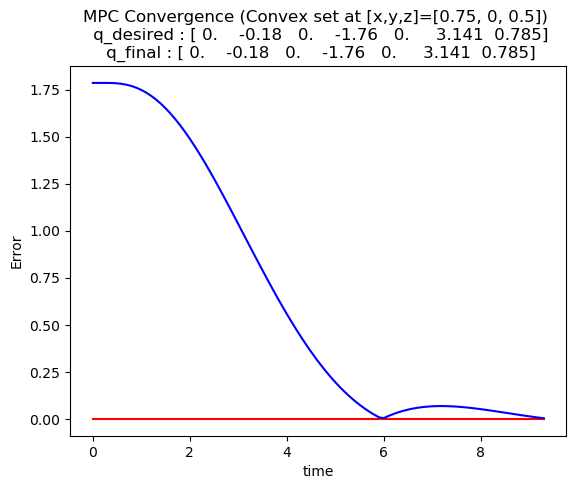

In [7]:
def visualize_error(error_list, t, x_final):
    error_desired = [0]*len(error_list)
    plt.title("MPC Convergence (Convex set at [x,y,z]=[0.75, 0, 0.5]) \n q_desired : {}\n q_final : {}".format(np.round(random_seed2,3), np.round(random_seed2,3)))
    # plt.title("".format())
    plt.xlabel("time")
    plt.ylabel("Error")
    plt.plot(t[:-1], error_desired, "r-")
    plt.plot(t[:-1], error_list, color='blue')
    plt.show()

visualize_error(error_list,t, x_final)

In [12]:
# Final State
print("x initial")
print(x0)
print(" ")

print("x desired: ")
print(x_final)
print(" ")

print("x[-1]:   ")
print(np.round(x[-1],2))
print(" ")

x initial
[-1.47340695  0.          0.         -0.89646284  0.          0.
 -1.47340695  0.          0.         -2.3341258   0.          0.
 -1.47340695  0.          0.          0.90889299  0.          0.
 -1.47340695  0.          0.        ]
 
x desired: 
[ 1.10698611  0.          0.          0.67352194  0.          0.
  1.10698611  0.          0.         -0.99730532  0.          0.
  1.10698611  0.          0.          2.58771151  0.          0.
  1.10698611  0.          0.        ]
 
x[-1]:   
[ 0.    0.    0.   -0.18 -0.01  0.01  0.    0.    0.   -1.76 -0.01  0.01
  0.    0.    0.    3.14 -0.02  0.02  0.78  0.    0.  ]
 


In [10]:
with open("convexset_q.pkl", "wb") as f:
    pickle.dump(x,f)

# Test for robustness of MPC

In [11]:
passed_counter = 0
passedlist = []
failedlist = []
initial_error = []
final_error = []
for i in range(100):
    print("Iteration no.: ", i)
    pass_state_dict = {}
    fail_state_dict = {}
    x0      = np.zeros(21)
    x_final      = np.zeros(21)
    lowerLim = np.array([-2.8973, -1.7628, -2.8973, -3.0718, -2.8973, -0.0175, -2.8973])    # Lower joint limits in radians ** This does not include gripper
    upperLim = np.array([ 2.8973,  1.7628,  2.8973, -0.0698,  2.8973,  3.7525,  2.8973])    # Upper joint limits in radians (grip in mm)
    random_seed1 = random.uniform(lowerLim, upperLim)
    random_seed2 = random.uniform(lowerLim, upperLim)
    # print(random_seed1)
    # print(random_seed2)
    x0[0] = random_seed1[0]
    x0[3] = random_seed1[1]
    x0[6] = random_seed1[2]
    x0[9] = random_seed1[3]
    x0[12] = random_seed1[4]
    x0[15] = random_seed1[5]
    x0[18] = random_seed1[6]

    x_final[0] = random_seed2[0]
    x_final[3] = random_seed2[1]
    x_final[6] = random_seed2[2]
    x_final[9] = random_seed2[3]
    x_final[12] = random_seed2[4]
    x_final[15] = random_seed2[5]
    x_final[18] = random_seed2[6]
    # print(x0)
    # print(x_final)
    x, u, t, error_list = simulate_arm(x0, x_final, tf, robotic_arm)
    print("Starting error: ",error_list[0])
    print("Iteration end error: ",error_list[-1])
    initial_error.append(np.array(error_list)[0])
    final_error.append(np.array(error_list)[-1])
    if(np.array(error_list)[-1]<0.1):
        passed_counter+=1
        print("Passed")
        pass_state_dict["x0"] = x0
        pass_state_dict["x_final"] = x_final
        pass_state_dict["time_taken"] = t[-1]
        passedlist.append(pass_state_dict)
    else:
        print("Failed")
        fail_state_dict["x0"] = x0
        fail_state_dict["x_final"] = x_final
        fail_state_dict["time_taken"] = t[-1]
        failedlist.append(fail_state_dict)
    print(" ")
        


Iteration no.:  0
Error:  3.3177693724905493
Time step:  0.0
 


KernelInterrupted: Execution interrupted by the Jupyter kernel.

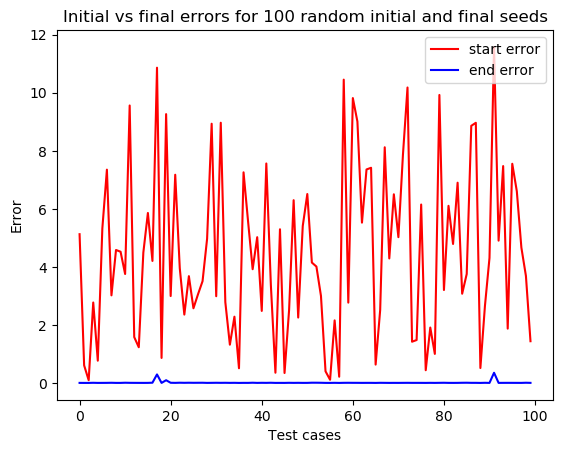

In [ ]:
error_desired = [0]*len(error_list)
plt.title("Initial vs final errors for 100 random initial and final seeds")
# plt.title("".format())
plt.xlabel("Test cases")
plt.ylabel("Error")
plt.plot(initial_error, "red", label="start error")
plt.plot(final_error, color='blue', label="end error")
plt.legend(loc="best")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8311edae-9044-4c06-b71a-2982d0a8ee35' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>